In [175]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline


In [176]:
df1=pd.read_excel('synthetic_control_2.xlsx',header=None)

In [177]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,28.7812,34.4632,31.3381,31.2834,28.9207,33.7596,25.3969,27.7849,35.2479,27.1159,...,31.4333,24.5556,33.7431,25.0466,34.9318,34.9879,32.4721,33.3759,25.4652,25.8717
1,24.8923,25.7410,27.5532,32.8217,27.8789,31.5926,31.4861,35.5469,27.9516,31.6595,...,32.5577,31.0205,26.6418,28.4331,33.6564,26.4244,28.4661,34.2484,32.1005,26.6910
2,31.3987,30.6316,26.3983,24.2905,27.8613,28.5491,24.9717,32.4358,25.2239,27.3068,...,33.6318,26.5966,25.5387,32.5434,25.5772,29.9897,31.3510,33.9002,29.5446,29.3430
3,25.7740,30.5262,35.4209,25.6033,27.9700,25.2702,28.1320,29.4268,31.4549,27.3200,...,34.6292,28.7261,28.2979,31.5787,34.6156,32.5492,30.9827,24.8938,27.3659,25.3069
4,27.1798,29.2498,33.6928,25.6264,24.6555,28.9446,35.7980,34.9446,24.5596,34.2366,...,27.7218,27.9601,35.7198,27.5760,35.3375,29.9993,34.2149,33.1276,31.1057,31.0179


insure that the data is normalized

In [178]:
df2=df1.convert_dtypes(convert_floating=True)

In [179]:
df2.shape

(600, 60)

In [180]:
pca=PCA(2)

In [181]:
df2_pca=pca.fit_transform(df2)

In [182]:
df2_pca.shape

(600, 2)

In [183]:
scaler = StandardScaler()
scaler.fit(df2_pca)

StandardScaler()

In [184]:
df2_standard=scaler.transform(df2_pca)

In [185]:
df2_standard

array([[-0.00375792, -0.2368235 ],
       [ 0.04573027, -0.10484324],
       [ 0.0500877 , -0.17166161],
       ...,
       [ 0.81440409, -0.09066941],
       [ 1.34611919,  0.22286602],
       [ 1.4258849 , -0.4151263 ]])

Generate the label values

In [186]:
lst=[]
for count,values in enumerate(range(600)):
    if count < 100:
        lst.append(1)
    if (count >= 100) and (count < 200):
        lst.append(2)
        
    if (count >= 200) and (count < 300):
        lst.append(3)
    if (count >= 300) and (count < 400):
        lst.append(4)
    if (count >= 400) and (count < 500):
        lst.append(5)
    if (count >= 500):
        lst.append(6)

In [187]:
df_label=pd.DataFrame()

In [188]:
df_label['class']=lst

In [189]:
df2

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,28.7812,34.4632,31.3381,31.2834,28.9207,33.7596,25.3969,27.7849,35.2479,27.1159,...,31.4333,24.5556,33.7431,25.0466,34.9318,34.9879,32.4721,33.3759,25.4652,25.8717
1,24.8923,25.741,27.5532,32.8217,27.8789,31.5926,31.4861,35.5469,27.9516,31.6595,...,32.5577,31.0205,26.6418,28.4331,33.6564,26.4244,28.4661,34.2484,32.1005,26.691
2,31.3987,30.6316,26.3983,24.2905,27.8613,28.5491,24.9717,32.4358,25.2239,27.3068,...,33.6318,26.5966,25.5387,32.5434,25.5772,29.9897,31.351,33.9002,29.5446,29.343
3,25.774,30.5262,35.4209,25.6033,27.97,25.2702,28.132,29.4268,31.4549,27.32,...,34.6292,28.7261,28.2979,31.5787,34.6156,32.5492,30.9827,24.8938,27.3659,25.3069
4,27.1798,29.2498,33.6928,25.6264,24.6555,28.9446,35.798,34.9446,24.5596,34.2366,...,27.7218,27.9601,35.7198,27.576,35.3375,29.9993,34.2149,33.1276,31.1057,31.0179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,29.6254,25.5034,31.5978,31.4663,33.5488,28.2935,28.9244,30.6922,25.3301,26.8728,...,26.7468,18.8795,21.3321,23.6915,22.3097,19.1361,15.2851,22.5278,20.6572,24.1289
596,27.4144,25.3973,26.46,31.9782,26.1251,27.4629,30.4888,34.9292,27.558,30.6863,...,19.1063,11.4546,16.888,18.2691,11.5831,14.1176,20.2289,11.1314,9.98019,10.7201
597,35.899,26.6719,34.1911,35.827,25.1009,24.8564,25.8141,30.6301,34.2124,32.5874,...,21.8787,16.0021,15.2879,16.9459,17.5338,16.8464,16.546,15.9268,18.0843,17.4747
598,24.5383,24.2802,28.2814,27.1316,26.6623,32.11,32.81,30.4829,35.8586,25.3866,...,19.6441,11.5238,15.4185,12.6699,13.1164,8.23496,12.0419,19.3096,12.9985,17.4599


In [190]:
df2.shape

(600, 60)

In [191]:
x=df2_standard
y=df_label['class']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.4, shuffle=True,random_state=42)

In [192]:
clf=SVC(kernel='sigmoid',gamma ='auto',decision_function_shape='ovo', degree=5)
#clf.fit(x_train,y_train)
clf.fit(x_train,y_train)

SVC(decision_function_shape='ovo', degree=5, gamma='auto', kernel='sigmoid')

In [193]:
clf.predict(x_test)

array([1, 5, 4, 1, 2, 3, 1, 3, 1, 4, 1, 2, 2, 2, 4, 3, 1, 3, 2, 1, 1, 6,
       4, 4, 4, 2, 1, 1, 2, 5, 6, 1, 1, 3, 1, 5, 2, 4, 5, 3, 4, 1, 6, 4,
       1, 1, 5, 1, 1, 3, 3, 5, 1, 2, 2, 4, 3, 1, 1, 2, 1, 1, 4, 6, 4, 1,
       4, 4, 1, 4, 4, 1, 5, 4, 5, 4, 4, 3, 2, 3, 3, 3, 4, 4, 1, 1, 1, 5,
       4, 3, 3, 4, 1, 6, 3, 3, 3, 1, 3, 1, 1, 3, 2, 4, 1, 5, 1, 3, 3, 5,
       1, 5, 6, 4, 4, 4, 4, 1, 5, 5, 1, 1, 4, 6, 1, 1, 2, 3, 4, 5, 1, 4,
       2, 1, 3, 1, 1, 1, 3, 1, 1, 5, 1, 1, 5, 1, 4, 3, 1, 1, 4, 6, 4, 4,
       4, 3, 1, 3, 2, 1, 4, 3, 1, 3, 4, 1, 5, 3, 4, 4, 3, 3, 2, 5, 1, 1,
       3, 1, 1, 3, 1, 3, 4, 5, 5, 4, 4, 5, 4, 3, 5, 4, 1, 3, 5, 3, 3, 4,
       4, 1, 2, 3, 5, 1, 3, 3, 5, 3, 5, 3, 4, 4, 2, 2, 5, 2, 4, 1, 4, 1,
       1, 5, 1, 2, 6, 5, 4, 6, 1, 4, 1, 3, 5, 5, 2, 1, 3, 5, 5, 3],
      dtype=int64)

In [194]:
clf.score(x_test,y_test)

0.6291666666666667

In [195]:
clf.support_vectors_[:10,:] # get support vectors

array([[ 0.01736488, -0.52404662],
       [-0.04889505, -0.19426532],
       [ 0.03469206, -0.45699575],
       [-0.0632833 ,  0.13604535],
       [-0.04370139, -0.43589231],
       [ 0.07595041, -0.02978624],
       [-0.0844028 , -0.44128666],
       [-0.09924666,  0.20057388],
       [ 0.05864544, -0.27918   ],
       [-0.00224316, -0.35836838]])

In [196]:
clf.support_ # Get support vector indices

array([  9,  11,  14,  15,  18,  27,  33,  37,  38,  41,  48,  51,  53,
        77,  89, 107, 146, 195, 201, 205, 210, 211, 212, 220, 221, 229,
       239, 252, 257, 258, 276, 281, 282, 284, 289, 303, 305, 307, 316,
       330, 334, 346, 348, 354, 355,   4,   8,  10,  12,  23,  28,  54,
        57,  66,  68,  69,  70,  75,  92, 103, 112, 115, 120, 131, 132,
       142, 148, 162, 163, 169, 174, 176, 178, 182, 183, 191, 199, 202,
       207, 209, 213, 214, 244, 251, 263, 275, 278, 283, 287, 301, 320,
       327, 339, 345, 356,  17,  19,  20,  26,  47,  50,  52,  55,  84,
        93, 100, 102, 104, 124, 128, 129, 133, 135, 144, 147, 158, 171,
       180, 181, 187, 193, 204, 206, 215, 218, 222, 232, 234, 237, 238,
       240, 245, 249, 253, 254, 260, 262, 267, 269, 271, 288, 291, 292,
       296, 297, 306, 315, 319, 325, 333, 338, 351, 357,   1,   5,  16,
        21,  24,  29,  31,  34,  44,  59,  65,  67,  72,  74,  76,  85,
        86,  87,  94,  98,  99, 109, 111, 117, 118, 134, 141, 14

In [197]:
support_vectors=clf.support_vectors_

In [198]:
support_vectors_indices=clf.support_

In [199]:
support_vectors.shape

(329, 2)

In [200]:
number_of_supports=clf.n_support_ # get number of support vectors for each class

In [201]:
number_of_supports

array([45, 50, 58, 57, 60, 59])

In [202]:
df3=np.append(df2_standard,df_label,axis=1)

In [203]:
df3

array([[-3.75792399e-03, -2.36823495e-01,  1.00000000e+00],
       [ 4.57302711e-02, -1.04843238e-01,  1.00000000e+00],
       [ 5.00877013e-02, -1.71661613e-01,  1.00000000e+00],
       ...,
       [ 8.14404095e-01, -9.06694079e-02,  6.00000000e+00],
       [ 1.34611919e+00,  2.22866019e-01,  6.00000000e+00],
       [ 1.42588490e+00, -4.15126300e-01,  6.00000000e+00]])

In [204]:
filtered_label1=df3[df3[:,2]==1][:,0:2]
filtered_label2 = df3[df3[:,2]==2][:,0:2]
filtered_label3 = df3[df3[:,2]==3][:,0:2]
filtered_label4 = df3[df3[:,2]==4][:,0:2]
filtered_label5 = df3[df3[:,2]==5][:,0:2]
filtered_label6 = df3[df3[:,2]==6][:,0:2]

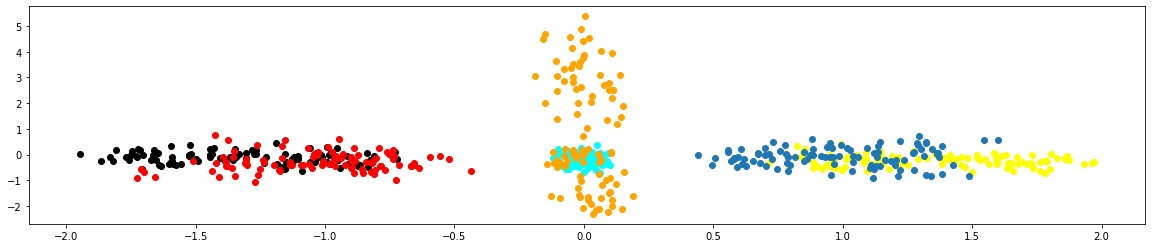

In [205]:
plt.figure(figsize=(20,4))
plt.scatter(x=filtered_label1[:,0],y=filtered_label1[:,1],c='cyan')
plt.scatter(x=filtered_label2[:,0],y=filtered_label2[:,1],c='orange')
plt.scatter(x=filtered_label3[:,0],y=filtered_label3[:,1],c='black')
plt.scatter(x=filtered_label4[:,0],y=filtered_label4[:,1],c='yellow')
plt.scatter(x=filtered_label5[:,0],y=filtered_label5[:,1],c='red')
plt.scatter(x=filtered_label6[:,0],y=filtered_label6[:,1],)


#plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], c='blue')
plt.show()

### The support vector machine does not work for thei problem. there are too many over laping values.


# Moving forward with Stochastic Gradient for classification

In [206]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,28.7812,34.4632,31.3381,31.2834,28.9207,33.7596,25.3969,27.7849,35.2479,27.1159,...,31.4333,24.5556,33.7431,25.0466,34.9318,34.9879,32.4721,33.3759,25.4652,25.8717
1,24.8923,25.7410,27.5532,32.8217,27.8789,31.5926,31.4861,35.5469,27.9516,31.6595,...,32.5577,31.0205,26.6418,28.4331,33.6564,26.4244,28.4661,34.2484,32.1005,26.6910
2,31.3987,30.6316,26.3983,24.2905,27.8613,28.5491,24.9717,32.4358,25.2239,27.3068,...,33.6318,26.5966,25.5387,32.5434,25.5772,29.9897,31.3510,33.9002,29.5446,29.3430
3,25.7740,30.5262,35.4209,25.6033,27.9700,25.2702,28.1320,29.4268,31.4549,27.3200,...,34.6292,28.7261,28.2979,31.5787,34.6156,32.5492,30.9827,24.8938,27.3659,25.3069
4,27.1798,29.2498,33.6928,25.6264,24.6555,28.9446,35.7980,34.9446,24.5596,34.2366,...,27.7218,27.9601,35.7198,27.5760,35.3375,29.9993,34.2149,33.1276,31.1057,31.0179


In [207]:
df_label['class'].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [208]:
df1['class']=df_label['class'].copy()

In [209]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,class
0,28.7812,34.4632,31.3381,31.2834,28.9207,33.7596,25.3969,27.7849,35.2479,27.1159,...,24.5556,33.7431,25.0466,34.9318,34.9879,32.4721,33.3759,25.4652,25.8717,1
1,24.8923,25.7410,27.5532,32.8217,27.8789,31.5926,31.4861,35.5469,27.9516,31.6595,...,31.0205,26.6418,28.4331,33.6564,26.4244,28.4661,34.2484,32.1005,26.6910,1
2,31.3987,30.6316,26.3983,24.2905,27.8613,28.5491,24.9717,32.4358,25.2239,27.3068,...,26.5966,25.5387,32.5434,25.5772,29.9897,31.3510,33.9002,29.5446,29.3430,1
3,25.7740,30.5262,35.4209,25.6033,27.9700,25.2702,28.1320,29.4268,31.4549,27.3200,...,28.7261,28.2979,31.5787,34.6156,32.5492,30.9827,24.8938,27.3659,25.3069,1
4,27.1798,29.2498,33.6928,25.6264,24.6555,28.9446,35.7980,34.9446,24.5596,34.2366,...,27.9601,35.7198,27.5760,35.3375,29.9993,34.2149,33.1276,31.1057,31.0179,1


In [210]:
df4=df1.copy()

In [211]:
df4.shape

(600, 61)

In [212]:
df4[list(df4)[:-1]]

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,28.7812,34.4632,31.3381,31.2834,28.9207,33.7596,25.3969,27.7849,35.2479,27.1159,...,31.4333,24.5556,33.74310,25.0466,34.93180,34.98790,32.4721,33.3759,25.46520,25.8717
1,24.8923,25.7410,27.5532,32.8217,27.8789,31.5926,31.4861,35.5469,27.9516,31.6595,...,32.5577,31.0205,26.64180,28.4331,33.65640,26.42440,28.4661,34.2484,32.10050,26.6910
2,31.3987,30.6316,26.3983,24.2905,27.8613,28.5491,24.9717,32.4358,25.2239,27.3068,...,33.6318,26.5966,25.53870,32.5434,25.57720,29.98970,31.3510,33.9002,29.54460,29.3430
3,25.7740,30.5262,35.4209,25.6033,27.9700,25.2702,28.1320,29.4268,31.4549,27.3200,...,34.6292,28.7261,28.29790,31.5787,34.61560,32.54920,30.9827,24.8938,27.36590,25.3069
4,27.1798,29.2498,33.6928,25.6264,24.6555,28.9446,35.7980,34.9446,24.5596,34.2366,...,27.7218,27.9601,35.71980,27.5760,35.33750,29.99930,34.2149,33.1276,31.10570,31.0179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,29.6254,25.5034,31.5978,31.4663,33.5488,28.2935,28.9244,30.6922,25.3301,26.8728,...,26.7468,18.8795,21.33210,23.6915,22.30970,19.13610,15.2851,22.5278,20.65720,24.1289
596,27.4144,25.3973,26.4600,31.9782,26.1251,27.4629,30.4888,34.9292,27.5580,30.6863,...,19.1063,11.4546,16.88800,18.2691,11.58310,14.11760,20.2289,11.1314,9.98019,10.7201
597,35.8990,26.6719,34.1911,35.8270,25.1009,24.8564,25.8141,30.6301,34.2124,32.5874,...,21.8787,16.0021,15.28790,16.9459,17.53380,16.84640,16.5460,15.9268,18.08430,17.4747
598,24.5383,24.2802,28.2814,27.1316,26.6623,32.1100,32.8100,30.4829,35.8586,25.3866,...,19.6441,11.5238,15.41850,12.6699,13.11640,8.23496,12.0419,19.3096,12.99850,17.4599


In [213]:
scaler.fit(df4[list(df4)[:-1]])

StandardScaler()

In [214]:
np4_standard=scaler.transform(df4[list(df4)[:-1]])

In [215]:
np4_standard.shape

(600, 60)

In [216]:
df4_standard = pd.DataFrame(data=np4_standard,columns=None)

In [217]:
type(df4_standard)

pandas.core.frame.DataFrame

In [218]:
df4_standard['class'] = df_label['class'].copy()

In [219]:
df4_standard

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,class
0,-0.355014,0.854574,-0.106416,-0.162030,-0.519860,0.567628,-1.193718,-0.293041,1.276395,-0.209509,...,-0.350891,0.286327,-0.305560,0.335635,0.314779,0.146053,0.220628,-0.291505,-0.278202,1
1,-1.468484,-1.245022,-0.827369,0.101385,-0.710865,0.088730,0.302234,1.377726,-0.096555,0.571477,...,0.100299,-0.205764,-0.076480,0.249561,-0.253746,-0.118373,0.278284,0.134151,-0.225060,1
2,0.394429,-0.067763,-1.047356,-1.359476,-0.714092,-0.583871,-1.298178,0.708063,-0.609828,-0.176696,...,-0.208448,-0.282205,0.201562,-0.295687,-0.017048,0.072052,0.255274,-0.029811,-0.053045,1
3,-1.216036,-0.093135,0.671281,-1.134675,-0.694163,-1.308494,-0.521778,0.060378,0.562664,-0.174427,...,-0.059829,-0.091003,0.136305,0.314296,0.152876,0.047741,-0.339888,-0.169575,-0.314836,1
4,-0.813527,-0.400388,0.342110,-1.130720,-1.301847,-0.496467,1.361551,1.248081,-0.734830,1.014447,...,-0.113289,0.423304,-0.134458,0.363015,-0.016411,0.261090,0.204219,0.070334,0.055593,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,-0.113302,-1.302217,-0.056948,-0.130710,0.328661,-0.640357,-0.327106,0.332754,-0.589844,-0.251295,...,-0.747030,-0.573705,-0.397226,-0.516204,-0.737611,-0.988416,-0.496238,-0.599940,-0.391245,6
596,-0.746356,-1.327757,-1.035604,-0.043054,-1.032409,-0.823916,0.057224,1.244767,-0.170619,0.404196,...,-1.265218,-0.881663,-0.764025,-1.240120,-1.070786,-0.662089,-1.249337,-1.284872,-1.260973,6
597,1.682956,-1.020937,0.437027,0.616005,-1.220187,-1.399942,-1.091223,0.319387,1.081544,0.730971,...,-0.947845,-0.992543,-0.853533,-0.838520,-0.889623,-0.905187,-0.932447,-0.764992,-0.822853,6
598,-1.569842,-1.596664,-0.688661,-0.872973,-0.933918,0.203073,0.627481,0.287703,1.391311,-0.506753,...,-1.260389,-0.983493,-1.142784,-1.136641,-1.461331,-1.202491,-0.708904,-1.091247,-0.823813,6


In [220]:
from sklearn.linear_model import SGDClassifier

In [221]:
x=df4_standard[list(df4)[:-1]]

In [222]:
y=df4[list(df4)[-1]]

In [223]:
y.shape

(600,)

In [224]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.4, shuffle=True,random_state=42)

In [225]:
y_train.shape

(360,)

In [226]:
clf=SGDClassifier(loss='squared_hinge')

In [227]:
clf.fit(x_train,y_train)

SGDClassifier(loss='squared_hinge')

In [228]:
clf.predict(x_test)

array([2, 5, 1, 1, 2, 3, 1, 5, 1, 4, 1, 2, 2, 6, 4, 3, 1, 3, 2, 1, 1, 6,
       6, 6, 4, 6, 1, 2, 1, 1, 1, 2, 1, 3, 2, 5, 2, 6, 1, 3, 4, 1, 6, 6,
       1, 2, 5, 2, 1, 1, 3, 3, 2, 6, 1, 1, 3, 2, 2, 2, 1, 2, 4, 6, 6, 1,
       6, 6, 1, 4, 1, 1, 5, 4, 5, 6, 4, 3, 6, 5, 3, 5, 6, 4, 1, 1, 2, 3,
       4, 1, 3, 6, 1, 4, 3, 3, 3, 1, 5, 1, 1, 3, 6, 4, 1, 5, 2, 3, 3, 5,
       2, 5, 6, 6, 4, 4, 4, 2, 5, 5, 2, 1, 4, 1, 2, 2, 6, 3, 6, 5, 6, 6,
       2, 2, 5, 2, 1, 1, 3, 1, 1, 3, 2, 1, 5, 2, 4, 5, 1, 1, 6, 1, 4, 4,
       6, 3, 1, 5, 2, 1, 4, 3, 1, 5, 4, 2, 3, 3, 6, 4, 3, 3, 1, 5, 2, 1,
       5, 1, 1, 3, 2, 3, 6, 1, 5, 4, 4, 5, 4, 3, 5, 6, 1, 3, 5, 3, 5, 4,
       6, 2, 2, 5, 1, 2, 3, 3, 3, 3, 3, 5, 6, 6, 6, 2, 3, 2, 4, 1, 6, 1,
       2, 5, 1, 1, 4, 5, 4, 4, 1, 4, 1, 5, 3, 5, 6, 1, 5, 3, 5, 3],
      dtype=int64)

In [229]:
y_test

110    2
419    5
565    6
77     1
181    2
      ..
42     1
416    5
261    3
408    5
277    3
Name: class, Length: 240, dtype: int64

In [230]:
clf.score(x_test,y_test)

0.9291666666666667

## Random Forest

In [231]:
from sklearn.ensemble import RandomForestClassifier

In [232]:
clf=RandomForestClassifier()

In [233]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [235]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,x_train, y_train, cv=3)
scores

array([0.98333333, 0.98333333, 0.95      ])

In [138]:
clf.predict(x_test)

array([2, 5, 6, 1, 2, 3, 1, 5, 1, 4, 1, 2, 2, 6, 4, 3, 1, 3, 2, 1, 1, 6,
       6, 6, 4, 6, 1, 2, 6, 5, 6, 2, 1, 3, 2, 5, 2, 6, 5, 3, 4, 1, 6, 6,
       1, 2, 5, 2, 1, 5, 3, 3, 2, 6, 6, 6, 3, 2, 2, 2, 1, 2, 4, 6, 6, 1,
       6, 6, 1, 4, 6, 1, 5, 4, 5, 6, 4, 3, 6, 5, 3, 5, 4, 4, 1, 1, 2, 3,
       4, 3, 3, 6, 1, 4, 3, 3, 3, 1, 5, 1, 1, 3, 6, 4, 1, 5, 2, 3, 3, 5,
       2, 5, 6, 6, 4, 4, 4, 2, 5, 5, 2, 1, 4, 6, 2, 2, 6, 5, 6, 5, 1, 6,
       2, 2, 5, 2, 1, 1, 3, 1, 1, 3, 2, 1, 5, 2, 4, 5, 1, 1, 6, 6, 4, 4,
       6, 3, 1, 5, 2, 1, 4, 3, 1, 5, 4, 2, 3, 3, 6, 4, 3, 3, 6, 5, 2, 1,
       5, 1, 1, 3, 2, 3, 6, 5, 5, 4, 4, 5, 4, 3, 5, 6, 1, 3, 5, 3, 5, 4,
       6, 2, 2, 5, 5, 2, 3, 3, 3, 3, 3, 5, 6, 6, 6, 2, 3, 2, 4, 1, 6, 1,
       2, 5, 1, 6, 4, 5, 4, 4, 1, 4, 1, 5, 3, 5, 6, 1, 5, 3, 5, 3],
      dtype=int64)

In [139]:
clf.score(x_test,y_test)

0.9791666666666666